In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import numpy as np
plt.style.use('ggplot')

RDKit WARNING: [22:12:06] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
sdf = os.path.join(RDConfig.RDDocsDir, 'Book/data/cdk2.sdf')

In [3]:
mols = [m for m in Chem.SDMolSupplier(sdf)]
for mol in mols:
    AllChem.Compute2DCoords(mol)

['id', 'Cluster', 'MODEL.SOURCE', 'MODEL.CCRATIO', 'r_mmffld_Potential_Energy-OPLS_2005', 'r_mmffld_RMS_Derivative-OPLS_2005', 'b_mmffld_Minimization_Converged-OPLS_2005']
47
32


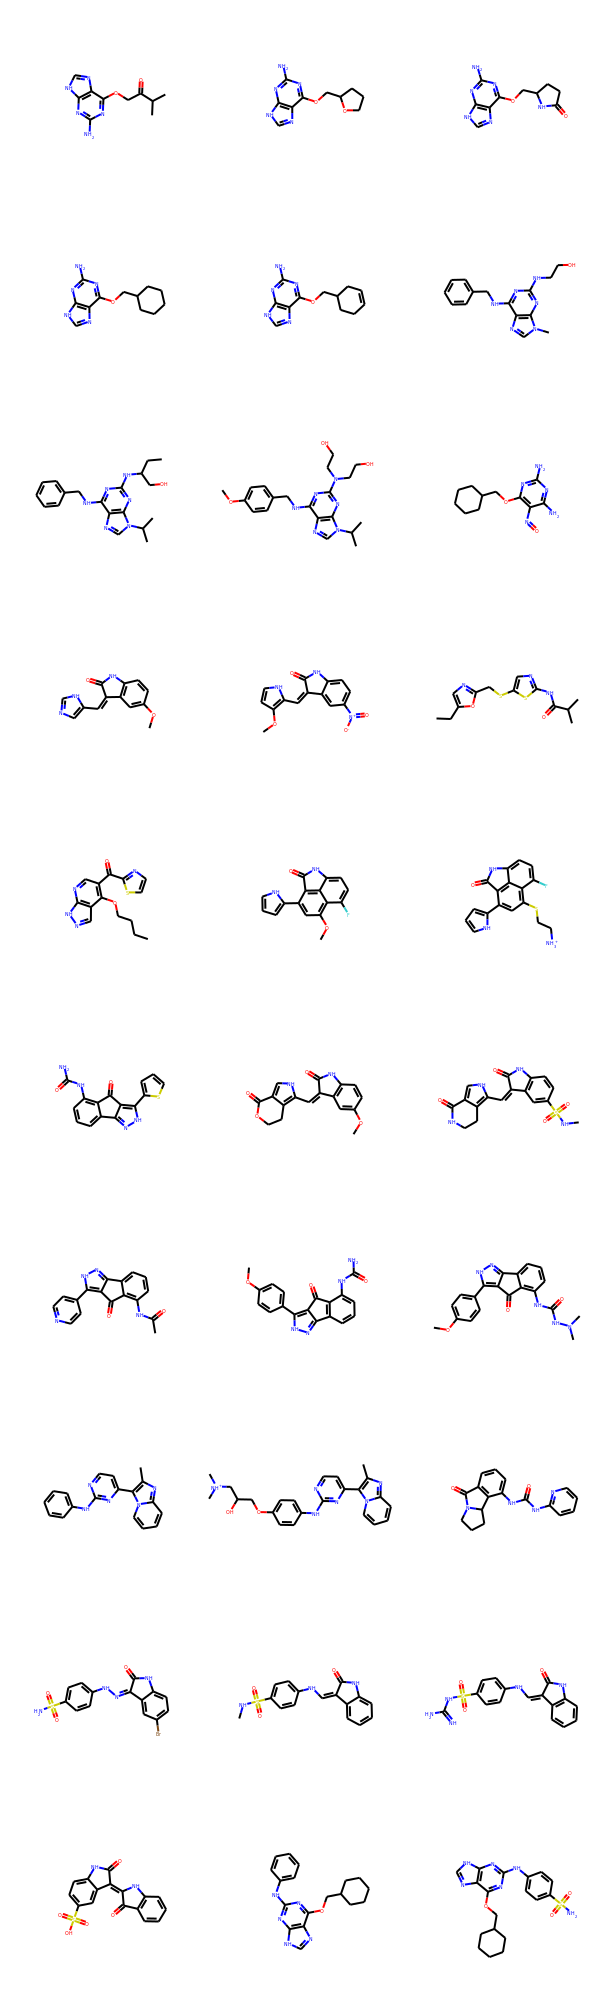

In [4]:
# Check prop names
print(list(mols[0].GetPropsAsDict().keys()))
print(len(mols))
print(len(set([mol.GetProp('Cluster') for mol in mols])))
Draw.MolsToGridImage(mols[:30], molsPerRow=3)

In [5]:
X = [list(AllChem.GetMorganFingerprintAsBitVect(mol, 2)) for mol in mols]
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcares = pca.fit_transform(X)

In [6]:
isoforest = IsolationForest(contamination='auto')

In [7]:
isoforest.fit(pcares)
isoforest_res = isoforest.fit_predict(pcares)

In [8]:
xx, yy = np.meshgrid(np.linspace(-5,5, 50), np.linspace(-5,5, 50))
cmap = {1:'blue', -1:'red'}
cs = [cmap[k] for k in isoforest_res]
z = isoforest.decision_function(np.c_[xx.ravel(), yy.ravel()])
print(z.shape)
print(xx.shape)
z = z.reshape(xx.shape)

(2500,)
(50, 50)


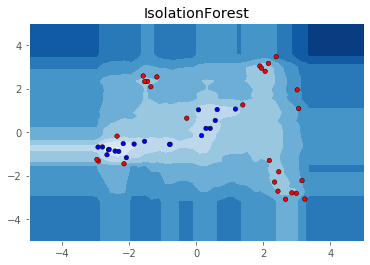

In [9]:
plt.title("IsolationForest")
plt.contourf(xx, yy, z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(pcares[:, 0], pcares[:, 1], c=cs,
                 s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.show()


/home/takayuki/anaconda3/envs/chemenv/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


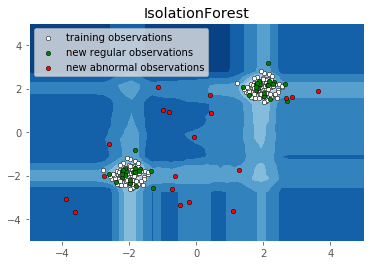

In [10]:
# from sklearn example from URL below
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination='auto')
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")